# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define functions

In [2]:
def get_percentage_df(df):
    df_perc = df[df['verified'] == True].groupby('millis').mean()
    df_perc['percentage_solved'] = 0.0
    size = df.shape[0]
    print("Dataframe contains " + str(size) + " elements")

    for index, row in df_perc.iterrows():
        df_solved = df[df['verified'] == True]
        num_solved = df_solved[df_solved['millis'] <= index].shape[0]
        percentage_solved = num_solved / df.shape[0]
        df_perc.at[index, 'percentage_solved'] = percentage_solved
    df_perc.at[180000, 'percentage_solved'] = df[df['verified'] == True].shape[0] / df.shape[0]

    return df_perc

def add_percentage_df(df_perc, df_add):
    df_perc['percentage_solved_y'] = 0.0
    for index, row in df_perc.iterrows():
        df_solved = df_add[df_add['verified'] == True]
        num_solved = df_solved[df_solved['millis'] <= index].shape[0]
        percentage_solved = num_solved / df_add.shape[0]
        df_perc.at[index, 'percentage_solved_y'] = percentage_solved
    df_perc.at[180000, 'percentage_solved_y'] = df_add[df_add['verified'] == True].shape[0] / df_add.shape[0]
    return df_perc

def split_synthetic_complex(df):
    df_synthetic = df[df['name'].str.match('synth')]
    df_complex = df[~df['name'].str.match('synth')]
    return df_synthetic, df_complex

def print_results(name, df):
    print("Results for '" + name + "':")
    df_synthetic, df_complex = split_synthetic_complex(df)
    num_synthetic = df_synthetic.shape[0]
    df_synthetic_solved = df_synthetic[df_synthetic['verified'] == True]
    num_synthetic_solved = df_synthetic_solved.shape[0]
    percentage_solved = num_synthetic_solved * 100 / num_synthetic if num_synthetic else 100
    print("Synthetic: " + str(num_synthetic_solved) + "/" + str(num_synthetic) + " (" + str(round(percentage_solved, 2)) + "%)")

    num_complex = df_complex.shape[0]
    df_complex_solved = df_complex[df_complex['verified'] == True]
    num_complex_solved = df_complex_solved.shape[0]
    percentage_solved = num_complex_solved * 100 / num_complex if num_complex else 100
    print("Complex: " + str(num_complex_solved) + "/" + str(num_complex) + " (" + str(round(percentage_solved, 2)) + "%)")

    num_overall = df.shape[0]
    df_solved = df[df['verified'] == True]
    num_solved = df_solved.shape[0]
    percentage_solved = num_solved * 100 / num_overall if num_overall else 100
    print("Overall: " + str(num_solved) + "/" + str(num_overall) + " (" + str(round(percentage_solved, 2)) + "%)")
    print()

# Load Data

In [25]:
# Create pandas dataframes from csv
df_FA = pd.read_csv("../logs/MainLog-FullBFS_Advanced.csv", sep=",", header=0)
df_F2 = pd.read_csv("../logs/v2/MainLog-2.05_FullBFS+.csv", sep=",", header=0)


# Detail logs
df_FA_detail = pd.read_csv("../logs/DetailLog-FullBFS_Advanced.csv", sep=",", header=0)
df_F2_detail = pd.read_csv("../logs/v2/DetailLog-2.04_FullBFS.csv", sep=",", header=0)

# Style plot
plt.style.use('default')
font = {'size' : 32}
plt.rc('font', **font)
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

# Print results for Light BFS

In [26]:
print_results('Full BFS +', df_F2)
print_results('New', df_FA)


Results for 'Full BFS +':
Synthetic: 391/441 (88.66%)
Complex: 209/220 (95.0%)
Overall: 600/661 (90.77%)

Results for 'New':
Synthetic: 397/441 (90.02%)
Complex: 211/220 (95.91%)
Overall: 608/661 (91.98%)



# Line Plot BFS Branch Size

C:\Users\lenna\AppData\Local\Temp/ipykernel_19652/1819423277.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


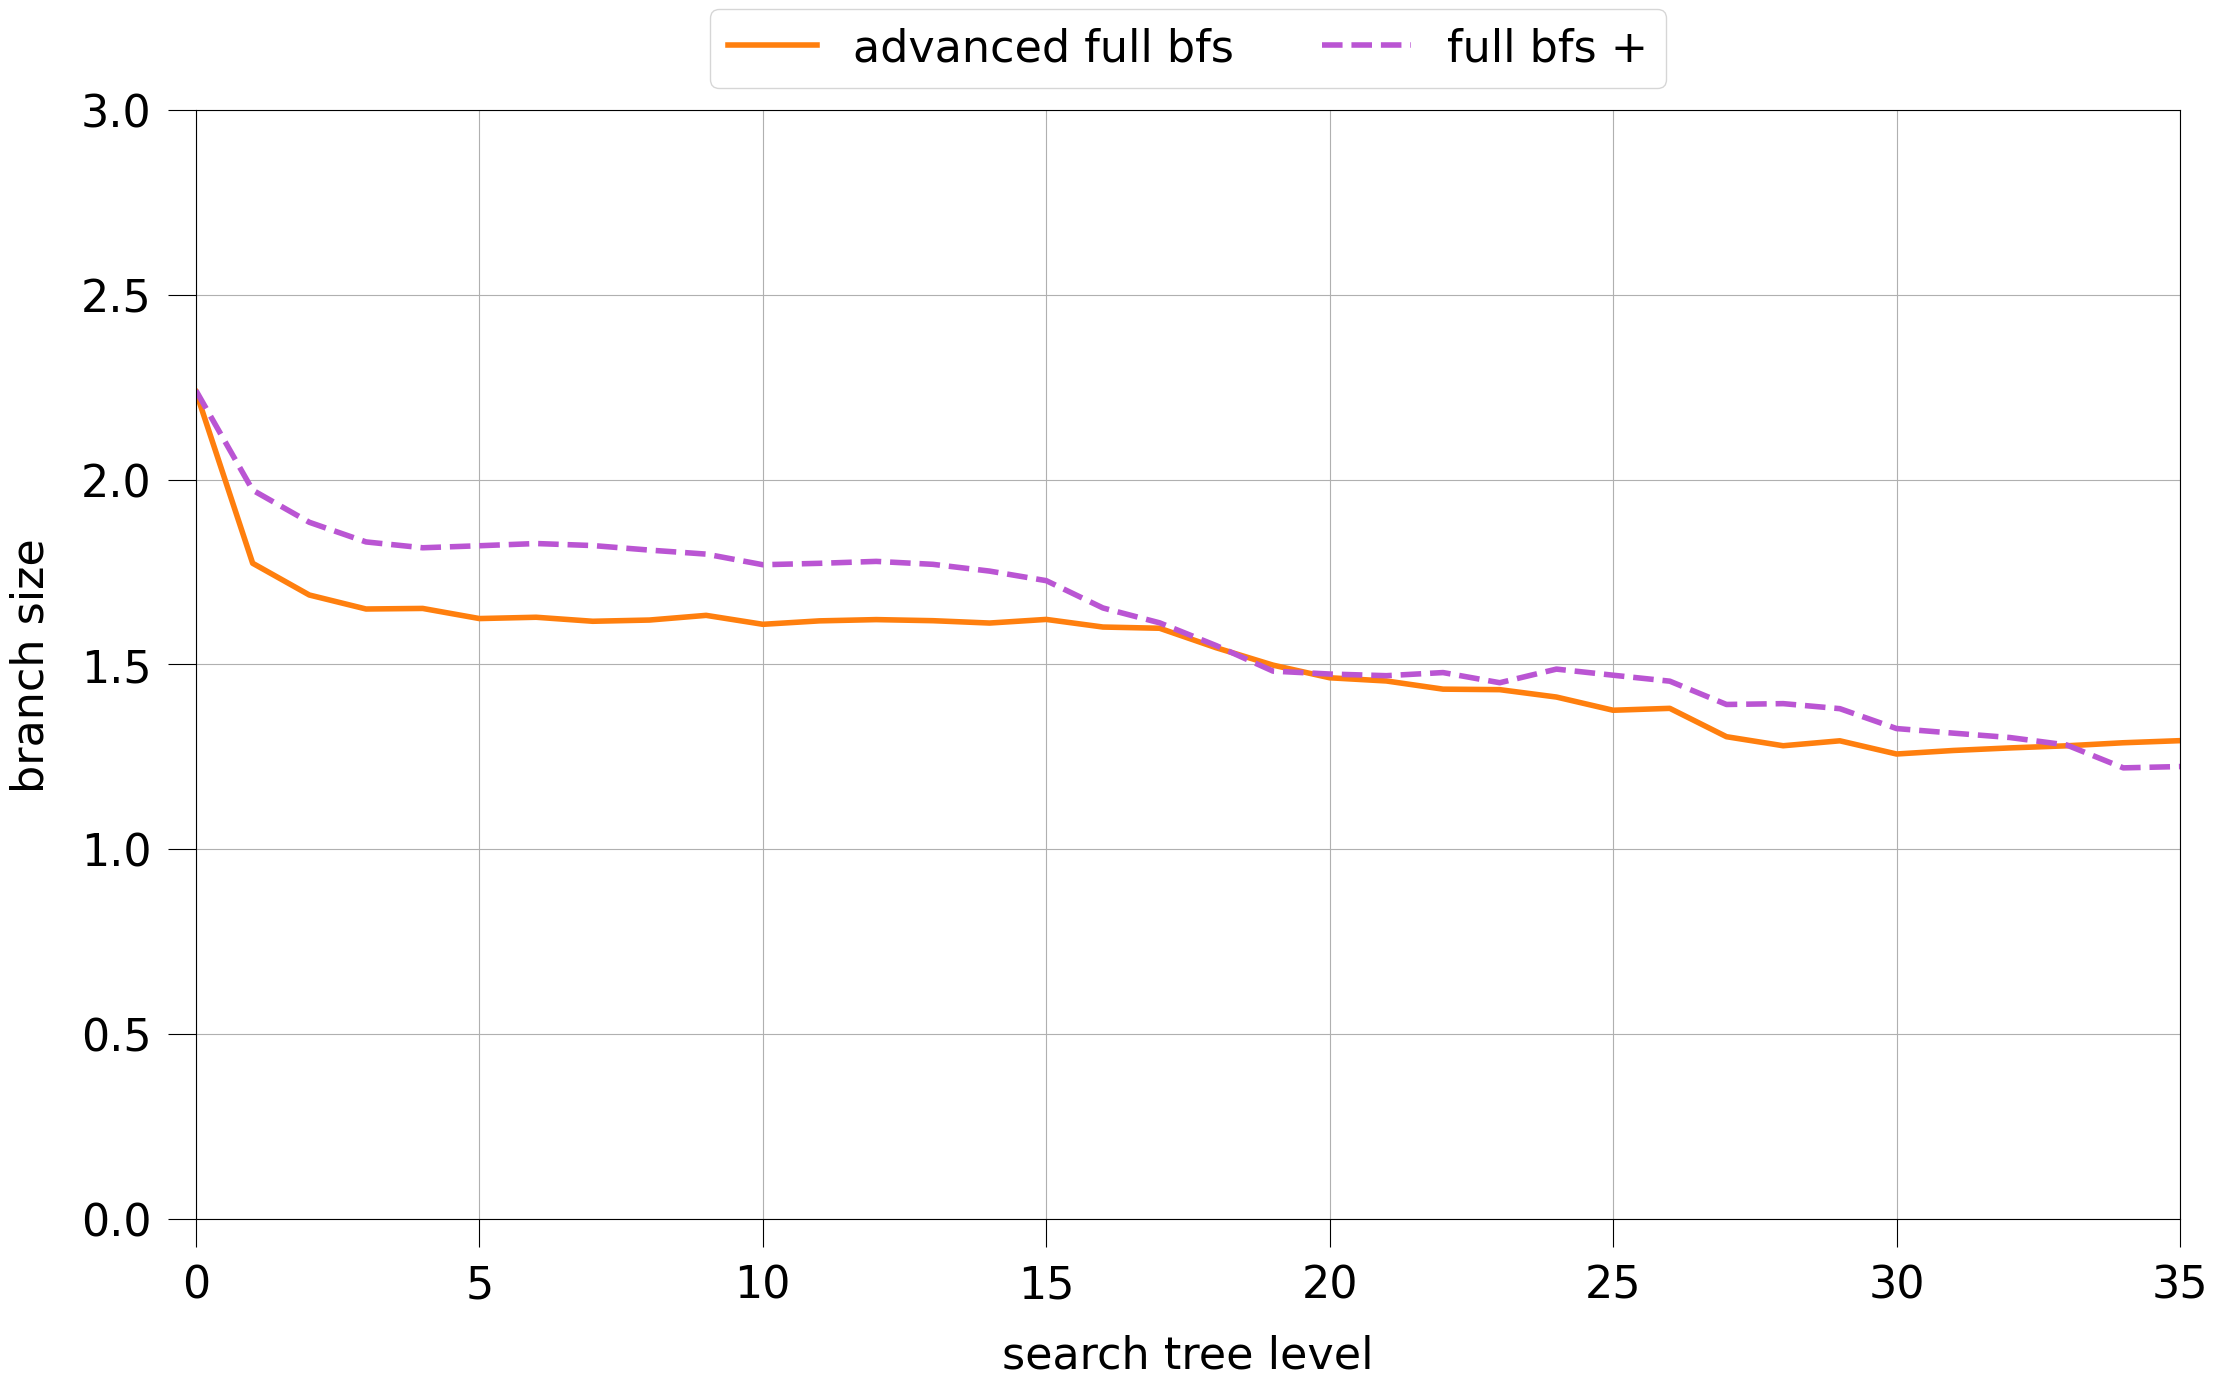

In [27]:
df_FA_detail_mean = df_FA_detail.groupby('level').mean()
df_F2_detail_mean = df_F2_detail.groupby('level').mean()

# Plot lines
fig, ax = plt.subplots(figsize=(25.6, 14.4))
ax.plot(df_FA_detail_mean['branch_size'], c='tab:orange', linewidth='4', label='advanced full bfs')
ax.plot(df_F2_detail_mean['branch_size'], c='mediumorchid', linestyle='dashed', linewidth='4', label='full bfs +')

ax.set_xlabel('search tree level', labelpad=20)
ax.set_ylabel('branch size', labelpad=20)
ax.set_xlim([0, 35])
ax.set_ylim([0, 3])
ax.set_xticks([0, 5, 10, 15, 20, 25, 30, 35])
ax.tick_params(axis='both', length=20, which='major', pad=12)
ax.grid()
ax.legend(bbox_to_anchor=(0, 1, 1, 0), loc='lower center', ncol=3)

fig.savefig('plots/v2/LinePlotBFSBranchSize.png',  bbox_inches='tight')
fig.show()